In [1]:
PROJECT_PATH = "C:/Users/Thierry/Desktop/ProjetInterPromo/ProjectInterPromo/"
"""
Created on Mon Jan 10 11:02:55 2022
Group 2
@authors: L-A C
"""

'\nCreated on Mon Jan 10 11:02:55 2022\nGroup 2\n@authors: L-A C\n'

# Importation

In [2]:
import pandas as pd
import plotly.express as px
import sweetviz as sv
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pyod.models.knn import KNN
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import confusion_matrix
pd.set_option('max_columns', None)
%matplotlib inline

# Normalisation des les données

In [3]:
df = pd.read_csv(PROJECT_PATH + 'data/CLEAN/donnee_v2_ech_train_transfo.csv').drop(columns="Unnamed: 0")

def normalize(df: pd.DataFrame):
    autre, bool_col = bool_other_col(df)

    y_col = ["TOP_FRAUDE", "TOP_FRAUDE_CARTE", "TOP_FRAUDE_VIREMENT"]

    autre_col = list(set(df.columns) - set(bool_col + y_col + ["ID"]))

    sub_df = df[autre_col]

    df[autre_col] = ((sub_df - sub_df.mean()) / sub_df.std())
    
    return df

# Variable à analyser

In [4]:
EQUIP = ['top_affecte', 'note_Funivers', 'note_Fassu', 'note_Fcredit', 'note_Fepargne', 'note_FService', 'top_produit_collecte', 'top_produit_monetaire_dispo', 'top_produit_monetaire_bloque', 'top_produit_emprunts', 'top_produit_epargne_logement', 'nb_DAV', 'nb_produit_Assurance', 'nb_produit_Cartes', 'nb_produit_Credit', 'nb_produit_Epargne', 'nb_produit_Services', 'top_DAV', 'top_produit_Assurance', 'top_produit_Cartes', 'top_produit_Credit', 'top_produit_Epargne', 'top_produit_Services']
DIG = ['TOP_E_RELEVE', 'MESSAGERIE_WEB_ACTIVE', 'FIAB_TEL_DOMICILE', 'FIAB_TEL_TRAVAIL', 'FIAB_TEL_PORTABLE', 'FIAB_EMAIL', 'REFUS_SEA', 'TOT_CNX_WEB_WEEK_6M', 'TOT_CNX_WEB_END_6M', 'TOT_CCOMPTE_WEB_6M', 'TOT_IMPRESSIONRIB_WEB_6M', 'TOT_TLCHGMTEDOC_WEB_6M', 'TOT_CCOMPTE_MBANQUE_6M', 'TOT_CMS_WEB_6M', 'TOT_CNX_INVSTORE_WEB_6M', 'NB_JR_WEB_6M', 'NB_CNXS_WEB_6M', 'DUREE_CNX_WEB_TOT_6M', 'DUREE_CNX_MOY_WEB_6M', 'NB_JR_MBANQUE_6M', 'NB_CNXS_MBANQUE_6M', 'NB_JR_CABOURSE_6M', 'NB_CNXS_CABOURSE_6M', 'NB_JR_MACARTE_6M', 'NB_CNXS_MACARTE_6M', 'ALERTE_SMS_6M', 'NB_SAISI_IBAN_6M', 'NB_RDV_MBANQUE_6M', 'NB_RDV_WEB_6M', 'NB_PAP_RECU_6M', 'NB_PAP_CLIQUEE_6M', 'TAUX_LECTURE_PAP_6M', 'TOP_SECURIPASS' ]
HB = ['NBJ_CNT_AGENCE_DEPOT_6M', 'NBJ_CNT_AGENCE_VENTE_6M', 'NBJ_CNT_RDV_AGENCE_6M', 'NBJ_CNT_AUTOMATE_RETRAIT_6M', 'NBJ_CNT_AUTOMATES_DEPOT_6M', 'NBJ_CNT_AGENCE_RETRAIT_6M', 'NBJ_CNT_AGENCE_6M', 'NBJ_CNT_SMS_6M', 'NBJ_CNT_EMAIL_6M', 'NBJ_CNT_APPELENTRANTS_6M', 'NBJ_CNT_AUTOMATE_6M', 'NBJ_CNT_LETTRES_6M', 'TOT_CVAD_WEB_6M', 'TOT_VEL_WEB_6M', 'TOT_ATT_SIGN_VAD_WEB_6M', 'TOT_CHABITAT_WEB_6M', 'TOT_MODIF_PARAM_CARTE_WEB_6M', 'TOT_VIR_WEB_6M', 'TOT_VIR_M_6M', 'NB_VIR_AGENCE_6M', 'NB_RETRAIT_MN_6M', 'NBPAIEMENTS_6M', 'MNTPAIEMENTS_6M', 'NBPAIEMENTS_WEB_6M', 'MNTPAIEMENTS_WEB_6M', 'NB_PAIEMENT_SS_CONTACT_6M', 'MNT_PAIEMENT_SS_CONTACT_6M', 'TX_PAIEMTNB_WEB_TOT_6M', 'TX_PAIEMTMTT_WEB_TOT_6M', 'NB_VEL_EPARGNE_6M', 'NB_VEL_PACIFICA_6M', 'NB_MAIL_RECU_6M', 'NB_MAIL_LU_6M', 'TAUX_LECTURE_EMAIL_6M', 'NB_MS_RECU_6M', 'NB_MS_LU_6M', 'TAUX_LECTURE_MS_6M', 'NB_DEPOSE_PREDICA_WEB_6M', 'NB_DEPOSE_PREDICA_AG_6M', 'NB_DEPOSE_PACIFICA_AG_6M', 'NB_DEPOSE_EPARGNE_WEB_6M', 'NB_DEPOSE_EPARGNE_MBQE_6M', 'NB_DEPOSE_EPARGNE_AG_6M', 'NB_DEPOSE_PACIFICA_WEB_6M', 'NB_VENTE_DEVIS_PACIFICA_WEB_6M', 'NB_VENTE_DEVIS_PACIFICA_AG_6M', 'NB_DEVIS_PACIFICA_WEB_6M', 'NB_DEVIS_PACIFICA_AG_6M', 'NB_VENTE_DEVIS_PACIFICA_6M', 'NB_PAIMT_PAYLIB_6M', 'MTT_PAIMT_PAYLIB_6M', 'top_entretien_3M', 'top_entretien_6M', 'top_entretien_12M', 'nb_mois_dernier_entretien', 'note_mire', 'note_FOpDebitrice', 'nb_pret_realise', 'mt_pret_realise', 'nb_mois_dern_realisation_pret', 'top_real_pret_3M', 'top_real_pret_6M', 'mt_op_cred_ep_a_terme_M', 'mt_op_cred_ep_a_terme_M6', 'mt_op_debit_ep_a_terme_M', 'mt_op_debit_ep_a_terme_M6', 'mt_operation_credit_depot_M', 'mt_operation_credit_depot_M6', 'mt_operation_credit_ep_a_vue_M', 'mt_operation_credit_ep_a_vue_M6', 'mt_operation_debit_depot_M', 'mt_operation_debit_depot_M6', 'mt_operation_debit_ep_a_vue_M', 'mt_operation_debit_ep_a_vue_M6', 'mt_paiement_carte_M', 'mt_paiement_carte_M6', 'mt_paiement_chq_M', 'mt_paiement_chq_M6', 'mt_pmts_carte_etr_M', 'mt_pmts_carte_etr_M6', 'mt_prlv_impaye', 'mt_remise_chq_M', 'mt_remise_chq_M6', 'mt_ret_carte_Aut_bq_M', 'mt_ret_carte_Aut_bq_M6', 'mt_ret_carte_CRCA_M', 'mt_ret_carte_CRCA_M6', 'mt_ret_carte_etr_M', 'mt_ret_carte_etr_M6', 'mt_retrait_carte_M', 'mt_retrait_carte_M6', 'nb_cheque_impaye', 'nb_commission_intervention', 'nb_ferm_prod_6M', 'nb_flux_cred_normeB2_M', 'nb_flux_cred_normeB2_M6', 'nb_irregularite_particuliere', 'nb_op_cred_ep_a_terme_M', 'nb_op_cred_ep_a_terme_M6', 'nb_op_debit_ep_a_terme_M', 'nb_op_debit_ep_a_terme_M6', 'nb_operation_credit_depot_M', 'nb_operation_credit_depot_M6', 'nb_operation_credit_ep_a_vue_M', 'nb_operation_credit_ep_a_vue_M6', 'nb_operation_debit_depot_M', 'nb_operation_debit_depot_M6', 'nb_operation_debit_ep_a_vue_M', 'nb_operation_debit_ep_a_vue_M6', 'nb_ouv_prod_6M', 'nb_paiement_carte_M', 'nb_paiement_carte_M6', 'nb_paiement_chq_M', 'nb_paiement_chq_M6', 'nb_pmts_carte_etr_M', 'nb_pmts_carte_etr_M6', 'nb_prlv_impaye', 'nb_remise_chq_M', 'nb_remise_chq_M6', 'nb_ret_carte_Aut_bq_M', 'nb_ret_carte_Aut_bq_M6', 'nb_ret_carte_CRCA_M', 'nb_ret_carte_CRCA_M6', 'nb_ret_carte_etr_M', 'nb_ret_carte_etr_M6', 'nb_retrait_carte_M', 'nb_retrait_carte_M6', 'top_debiteur_M', 'top_ferm_prod_6M', 'top_ouv_prod_6M', 'mt_rist_ttc_M', 'mt_rist_ttc_M6', 'Flag_bq_principale']

# Echantillonage

In [5]:
# Lecture du fichier de donnée
df = pd.read_csv(PROJECT_PATH + 'data/CLEAN/donnee_v2_ech_train_transfo.csv').drop(columns="Unnamed: 0")

print("Nombre de fraude :", sum(df["TOP_FRAUDE"]))
print("Nombre de données : ", len(df))
print("Ratio : ", sum(df["TOP_FRAUDE"]) / len(df) * 100)

# Suppression des variables qualitatives
quali_col = []
count = 0
for i, name in zip(df.dtypes, df.columns):
    if i == "object":
        quali_col.append(name)

data_quanti = df.drop(columns=quali_col)

# 
dfs = data_quanti.sample(100000)

print("------------ Sur un echantillion ------------")
print("Nombre de fraude :", sum(dfs["TOP_FRAUDE"]))
print("Nombre de données : ", len(dfs))
print("Ratio : ", sum(dfs["TOP_FRAUDE"]) / len(dfs) * 100)

Nombre de fraude : 1461
Nombre de données :  764471
Ratio :  0.19111254710773856
------------ Sur un echantillion ------------
Nombre de fraude : 188
Nombre de données :  100000
Ratio :  0.188


# Evaluation

In [6]:
def evaluation2(
    score: np.ndarray, y: np.ndarray, display=False):
    """Evaluation with predicted value

    Args:
        score (np.ndarray): Score for each individual, hight value => outlayer, low value => normal
        y (np.ndarray): True TOP_FRAUDE
        display (bool, optional): plot ROC curve. Defaults to False.

    Returns:
        list[float, list[float], list[float], list[float]]: [description]
    """
    precision, recall, thresholds = precision_recall_curve(y, score)
    f1_score = 2 * precision * recall / (precision + recall)

    value = auc(recall, precision)

    if display:
        plt.plot(recall, precision)
        plt.show()

    return value, f1_score, precision, recall


def evaluation3(score: np.ndarray, y: np.ndarray, percentage: float, display=True):
    """Evaluation with threshold

    Args:
        score (np.ndarray): Score for each individual, hight value => outlayer, low value => normal
        y (np.ndarray): True TOP_FRAUDE
        percentage (float): Threshold over 100 (example: 2%)
        display (bool, optional): display precision, recall, f1_score. Defaults to True.

    Returns:
        tp, fp, fn, tp
    """
    pred = score > sorted(score, key=lambda x: -x)[int(percentage / 100 * len(score))]

    confusion_mat = confusion_matrix(y, pred)

    tn, fp, fn, tp = confusion_mat.ravel()

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * precision * recall / (precision + recall)

    if display:
        print("TN / FP \nFN / TP")
        print(confusion_mat)
        print(f"Precision : {precision}")
        print(f"Recall : {recall}")
        print(f"F1_Score : {f1_score}")

    return tn, fp, fn, tp

# Modele HBOS

In [7]:
from pyod.models.hbos import HBOS

In [8]:
data_EQUIP = dfs[EQUIP]
data_DIG = dfs[DIG]
data_HB = dfs[HB]

### sample

In [ ]:
clf_name = 'HBOS'
clf = HBOS()
clf.fit(dfs)

In [ ]:
value, f1_score, precision, recall = evaluation2(y_scores, data["TOP_FRAUDE"], display=True)
print("Air sous la courbe : ", value)

In [ ]:
value, f1_score, precision, recall = evaluation3(y_scores, data["TOP_FRAUDE"], 20, display=True)
print("Air sous la courbe : ", value)

### EQUIP

In [9]:
clf_name = 'HBOS'
clf = HBOS()
clf.fit(data_EQUIP)
y_pred = clf.labels_ 
y_scores = clf.decision_scores_

<ipython-input-6-5c013ce26ccd>:14: RuntimeWarning: invalid value encountered in true_divide
  f1_score = 2 * precision * recall / (precision + recall)


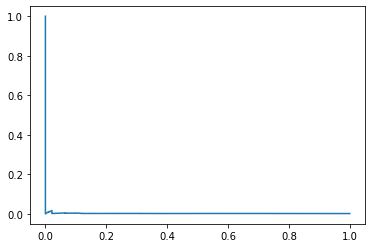

Air sous la courbe :  0.002459807372317848


In [10]:
value, f1_score, precision, recall = evaluation2(y_scores, dfs["TOP_FRAUDE"], display=True)
print("Air sous la courbe : ", value)

In [14]:
value, f1_score, precision, recall = evaluation3(y_scores, dfs["TOP_FRAUDE"], 0.2, display=True)
print("Air sous la courbe : ", value)

TN / FP 
FN / TP
[[99615   197]
 [  186     2]]
Precision : 0.010050251256281407
Recall : 0.010638297872340425
F1_Score : 0.0103359173126615
Air sous la courbe :  99615


### DIG

In [15]:
clf_name = 'HBOS'
clf = HBOS()
clf.fit(data_DIG)
y_pred = clf.labels_ 
y_scores = clf.decision_scores_

<ipython-input-6-5c013ce26ccd>:14: RuntimeWarning: invalid value encountered in true_divide
  f1_score = 2 * precision * recall / (precision + recall)


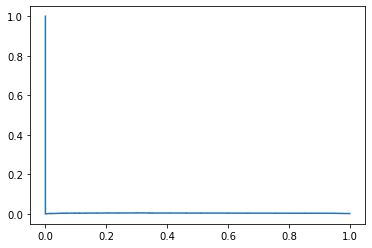

Air sous la courbe :  0.003874005005096539


In [16]:
value, f1_score, precision, recall = evaluation2(y_scores, dfs["TOP_FRAUDE"], display=True)
print("Air sous la courbe : ", value)

In [20]:
value, f1_score, precision, recall = evaluation3(y_scores, dfs["TOP_FRAUDE"], 0.2, display=True)
print("Air sous la courbe : ", value)

TN / FP 
FN / TP
[[99612   200]
 [  188     0]]
Precision : 0.0
Recall : 0.0
F1_Score : nan
Air sous la courbe :  99612


<ipython-input-6-5c013ce26ccd>:45: RuntimeWarning: invalid value encountered in double_scalars
  f1_score = 2 * precision * recall / (precision + recall)


### HB

In [22]:
clf_name = 'HBOS'
clf = HBOS()
clf.fit(data_HB)
y_pred = clf.labels_ 
y_scores = clf.decision_scores_

<ipython-input-6-5c013ce26ccd>:14: RuntimeWarning: invalid value encountered in true_divide
  f1_score = 2 * precision * recall / (precision + recall)


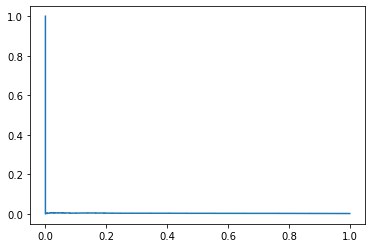

Air sous la courbe :  0.0032519287926738418


In [23]:
value, f1_score, precision, recall = evaluation2(y_scores, dfs["TOP_FRAUDE"], display=True)
print("Air sous la courbe : ", value)

In [26]:
value, f1_score, precision, recall = evaluation3(y_scores, dfs["TOP_FRAUDE"], 2, display=True)
print("Air sous la courbe : ", value)

TN / FP 
FN / TP
[[97822  1990]
 [  178    10]]
Precision : 0.005
Recall : 0.05319148936170213
F1_Score : 0.009140767824497258
Air sous la courbe :  97822
